# User Knowledge Clustering using K-Means
## Overview
### Background
User knowledge is where a person who uses knowledge generated through research to make informed decisions about policies, programs and/or best practices. This dataset was part of the Ph.D. Thesis of Dr. Hamdi Tolga Kahraman from Turkey back in 2009. It is an unlabelled dataset containing 5 features as explained in the column descriptions. The data contains real information about the student's knowledge status about the subject of Electrical DC Machines. The insipiration is to find clusters within data, explore their properties and make meaningful conclusions and actions / recommendations that might add value to the process from where the data was obtained.

### K-Means Clustering
Clustering is process of grouping of objects into groups that have same or similar properties. K-means is an algorithm in unsupervised learning that tries to partition or group data into K groups, where 1 k point is only owned by 1 group and the characteristics of the data in one group have a high similarity while the characteristics of data between gorups are different. In k means we will know several terms, i.e.:
- Cluster Centroids: The cluster centroid is the most representative point of a specific cluster. So, if we decide to find three clusters, we will have three cluster centroid.
- Euclidean Distance: Is the distance between two data points and this term is essential when gathering the distance between the cluster centroids and the data points.
- Elbow Method: The elbow method is a technique used to choose the most optimal number of clusters. Remember, in Kmeans clustering we add the number of clusters in a manual way, so the elbow method is useful when using Kmeans. 

**Criteria to produce good cluster**
- The similarity between members in a cluster (intracluster) is high
- Similarities between members of different clusters (inter-cluster) is low

**The way kmeans algorithm works**
- Specify number of clusters K.
- Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
    - Compute the sum of the squared distance between data points and all centroids.
    - Assign each data point to the closest cluster (centroid).
    - Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.
- Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

## Packages
The main module in python used for clustering is `scikit-learn`. Whereas for visualization here I use `plotly`.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

## Data Preparation 
First of all, we read the user knowledge dataset to see how far we can dig from the dataset.

In [2]:
os.chdir("/kaggle/input")
users = pd.read_csv('data_student.csv', delimiter=',')
users.head()

STG   SCG   STR   LPR   PEG       UNS
0  0.00  0.00  0.00  0.00  0.00  very_low
1  0.08  0.08  0.10  0.24  0.90      High
2  0.06  0.06  0.05  0.25  0.33       Low
3  0.10  0.10  0.15  0.65  0.30    Middle
4  0.08  0.08  0.08  0.98  0.24       Low

In [3]:
users.shape

(258, 6)

In [4]:
users.dtypes

STG     float64
SCG     float64
STR     float64
LPR     float64
PEG     float64
 UNS     object
dtype: object

1. The user knowledge dataset has 6 columns and 258 observations. The values in the criteria column for measuring user knowledge are numeric. Variable `UNS` has 4 unique values that represented knowledge level of users. The description of each variable is as follows:
- STG : The degree of study time for goal object materails
- SCG : The degree of repetition number of user for goal object materails
- STR : The degree of study time of user for related objects with goal object
- LPR : The exam performance of user for related objects with goal object
- PEG : The exam performance of user for goal objects
- UNS : The knowledge level of user

In [5]:
users.isna().sum()

STG     0
SCG     0
STR     0
LPR     0
PEG     0
 UNS    0
dtype: int64

In [6]:
users.duplicated().sum()

0

From the results above we know that the dataset we have doesn't have missing values and duplicates data. 
The statistical summary below shows that each variable has a data distribution that is not very different.

In [7]:
users.describe()

STG         SCG         STR         LPR         PEG
count  258.000000  258.000000  258.000000  258.000000  258.000000
mean     0.371147    0.355674    0.468004    0.432713    0.458539
std      0.210271    0.211962    0.245940    0.248108    0.255211
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.240750    0.210000    0.291250    0.250000    0.250000
50%      0.327000    0.302500    0.490000    0.330000    0.500000
75%      0.495000    0.497500    0.690000    0.647500    0.660000
max      0.990000    0.900000    0.950000    0.990000    0.930000

## Exploratory Data

In the previous stage we have done data tidying. After our data is tidy, the next step before entering clustering is we can explore the data to see the distribution and allow to see hidden patterns in the data. Below I show the distribution of data from each original class. From this bar chart we know that the highest proportion is in the Middle class, but the proportion in the Low class is also not much different from the Middle class. From this we can represent that the users involved in research have a medium-to-low level of knowledge.

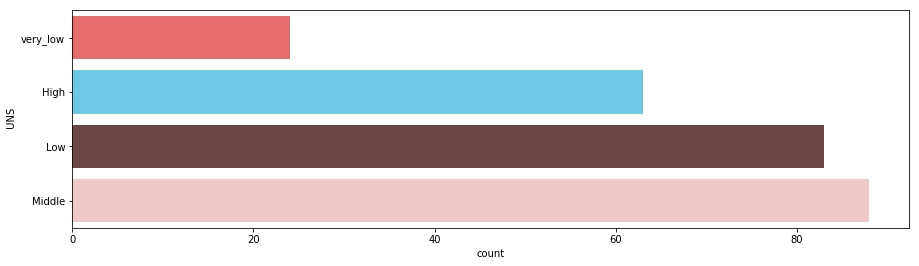

In [8]:
plt.figure(1 , figsize = (15 , 4))
pal1 = ["#FA5858", "#58D3F7", "#704041", "#f5c3c4"]
sns.countplot(y = ' UNS' , data = users, palette=pal1)
plt.show()

Text(0.5, 1.0, ' UNS')

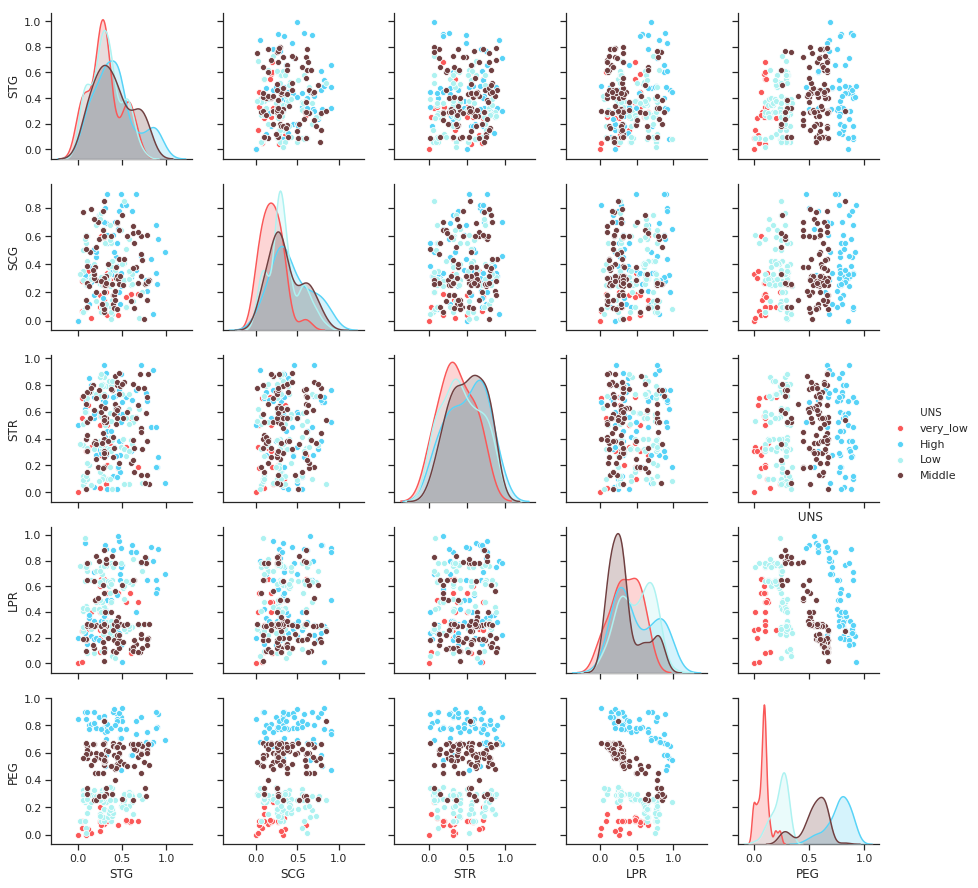

In [9]:
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7", "#adf2f1", "#704041", "#197a64"]

sns.pairplot(users, hue=" UNS", palette=pal)
plt.title(" UNS")

**Notice:**
The plot above shows the distribution in each variable / column. 
We can focus our attention on the PEG box. As we know that PEG is exam performance of user for goal objects. We can see that the higher result exam of a user, this user tends to be classified into the class of "high knowledge" and vice versa. 

## K-Means Clustering
### Find Optimum *k*
The elbow method is mostly used in unsupervised learning algorithms to determine the optimal number of clusters that should be used to find specific unknown groups within our population. The elbow method finds the average sum of squares distance between the cluster centroid and the data observations. Below I use 2 variables, STG and PEG, which are my reference in grouping data. This selection is based on the achievement of the exam results with the length of study time to achieve the goal.

In [10]:
X = users[['STG' , 'PEG']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    models = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=100, 
                        tol=0.0001,  random_state= 100  , algorithm='elkan') )
    models.fit(X)
    inertia.append(models.inertia_)

The graph below tells us that the *k* value which is considered quite optimum to be used for clustering is *k* = 3.

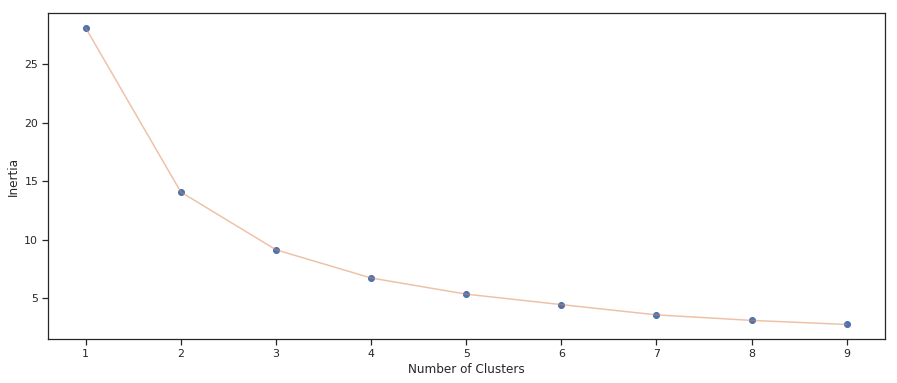

In [11]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

### Clustering and Visualization

After choosing the number *k* = 3, it means we will clustering users into 3 levels of user knowledge. 
To see how the characteristics of each cluster, let's look at the clustering graph below.

In [12]:
models = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
models.fit(X)
labels = models.labels_
centroids = models.cluster_centers_

In [13]:
print(models.cluster_centers_)
print(models.inertia_)
print(models.n_iter_)

[[0.71452381 0.61690476]
 [0.30986325 0.21284615]
 [0.29789899 0.68171717]]
9.13228020868021
6


The model has an inertia value of 9.13. Inertia is sum of squared distances of samples to their closest cluster center. From information above, to achieve convergence this model requires 6 iterations.

In [14]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=models.labels_, cmap="Set1_r", s=25)
plt.scatter(models.cluster_centers_[:,0] ,models.cluster_centers_[:,1], color='blue', marker="*", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

Cluster Characteristics:
- Cluster 1: centered at the point (0.71452381, 0.61690476). Users in this cluster have the ability to achieve goals with a high enough time and exam results show a high enough value. If referring to a research paper, this user group is classified as a user who has a `Middle` level of knowledge.
- Cluster 2: centered at the point (0.30986325, 0.21284615). Users in this cluster have the ability to achieve goals with relatively low time achievements and the exam results show quite low values as well. If referring to a research paper, this user group is classified as a user who has a `Low` level of knowledge.
- Cluster 3: center on the point (0.29789899, 0.68171717). Users in this cluster have the ability to achieve goals with relatively low time performance but the exam results show a high enough value. If referring to a research paper, this user group is classified as a user who has a `High` level of knowledge.

To see a more specific group, we will try to do clustering again by changing the value of k to k = 4.

In [15]:
models2 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
models2.fit(X)
labels2 = models2.labels_
centroids2 = models2.cluster_centers_
print(models2.cluster_centers_)

[[0.71810811 0.65594595]
 [0.51728889 0.24488889]
 [0.21289744 0.20478205]
 [0.299      0.68408163]]


In [16]:
print(models2.inertia_)
print(models2.n_iter_)

6.719604969646099
10


The second model with 4 clusters has an inertia value of 6.719. From information above, to achieve convergence this model requires 10 iterations. When compared with the previous model, this second model has a smaller value of inertia. That means the distance between samples and cluster points in the second model is shorter or it can be said that the clusters in the second model are denser than the first model. However, this second model requires more iterations to achieve convergence.

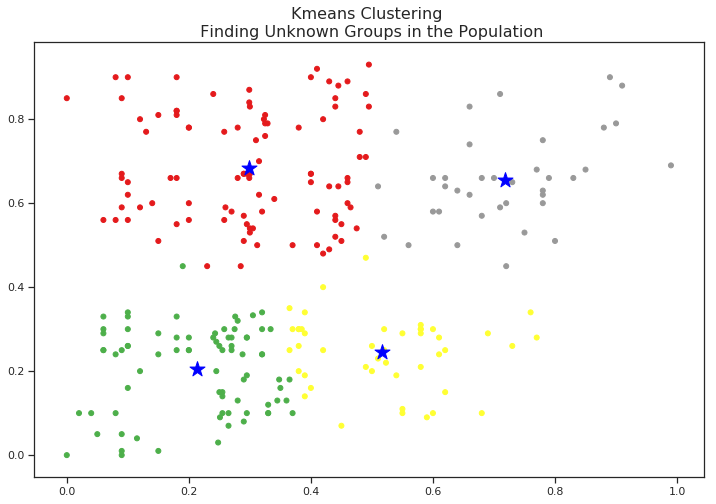

In [17]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=models2.labels_, cmap="Set1_r", s=25)
plt.scatter(models2.cluster_centers_[:,0] ,models2.cluster_centers_[:,1], color='blue', marker="*", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

Cluster Characteristics:
- Cluster 1: centered at the point (0.71810811, 0.65594595). Users in this cluster have the ability to achieve goals with quite high time achievements and exam results to achieve goals show high scores as well. Users in this cluster are classified as users who have a Middle level of understanding.
- Cluster 2: center on the point (0.51728889, 0.24488889). Users in this cluster have the ability to achieve goals with a high enough time but the results of the exam to reach the goal show a high value. Users in this cluster are classified as users who have a Very Low level of understanding.
- Cluster 3: center on the point (0.21289744, 0.20478205). Users in this cluster have the ability to achieve goals with relatively low time achievements and exam results to achieve goals show low scores as well. Users in this cluster are classified as users who have a low level of understanding.
- Cluster 4: centered at the point (0.29900000, 0.68408163). Users in this cluster have the ability to achieve goals with relatively low time performance, but the results of the exam to achieve goals show high scores. Users in this cluster are classified as users who have a high level of understanding.

**Conclusion:**
Users in cluster 2 need special attention and handling because when viewed in a long study period and it was sufficient but the exam scores obtained by these users tend to be small, this can happen because of other factors beyond the factors used for research.

## 3D Visualization

In [18]:
X1 = users[['STG' , 'LPR', 'PEG']].iloc[: , :].values
inertia = []
for n in range(1 , 10):
    models3 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=100, 
                        tol=0.0001,  random_state= 100  , algorithm='elkan') )
    models3.fit(X)
    inertia.append(models3.inertia_)

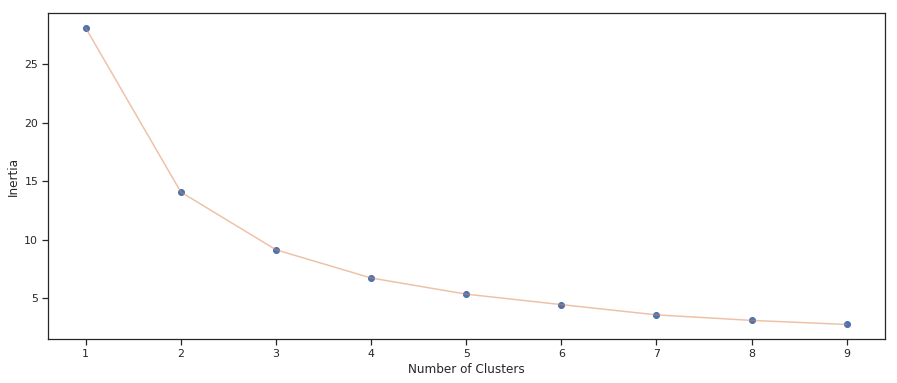

In [19]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 10) , inertia , 'o')
plt.plot(np.arange(1 , 10) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [20]:
models3 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
models3.fit(X)
labels3 = models3.labels_
centroids3 = models3.cluster_centers_

In [21]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [22]:
users['labels3'] =  labels3
trace3 = go.Scatter3d(
    x= users['STG'],
    y= users['LPR'],
    z= users['PEG'],
    mode='markers',
     marker=dict(
        color = users['labels3'], 
        size= 15,
        line=dict(
            color= users['labels3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace3]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'STG'),
            yaxis = dict(title  = 'LPR'),
            zaxis = dict(title  = 'PEG')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## Hierarchical clustering
Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other. 

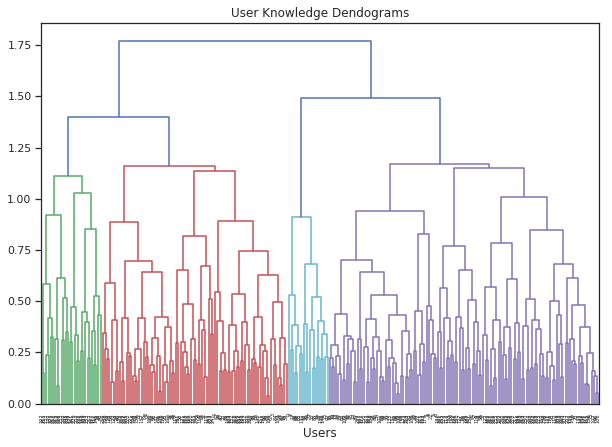

In [23]:
import scipy.cluster.hierarchy as shc
X = users[['STG', 'SCG', 'STR', 'LPR', 'PEG']].iloc[: , :].values
plt.figure(figsize=(10, 7))
plt.title("User Knowledge Dendograms")
plt.xlabel('Users')
dend = shc.dendrogram(shc.linkage(X, method='complete'))

At the bottom there are 258 points that make up each group. From each of these points will be grouped with other points that have the closest distance so that later it will only be one large group above. Each height in the dendrogram represents the distance between points in the cluster. We will get 4 cluster if we set distance of cluster 1.50 and 1.20.

### If you liked my work please UPVOTE , Thank you.